        Model  Accuracy  F1-score  Inference Time (ms)  Model Size (MB)  \
2  DistilBERT      0.86      0.85                    7              240   
4      ALBERT      0.88      0.87                    9              190   
0        BERT      0.90      0.89                   11              430   
1     RoBERTa      0.92      0.93                   15              510   
3       XLNet      0.91      0.92                   19              710   

   TOPSIS Score  Rank  
2      0.842898   1.0  
4      0.824200   2.0  
0      0.628256   3.0  
1      0.373567   4.0  
3      0.129752   5.0  


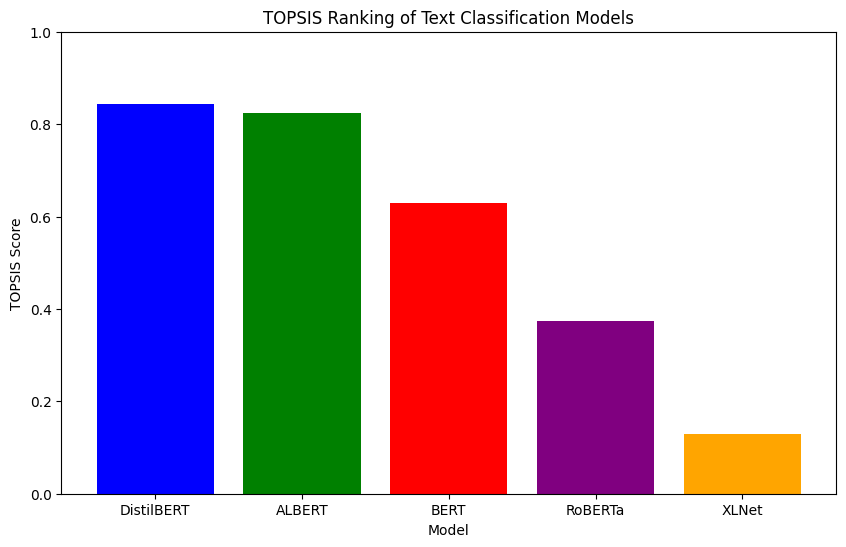

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def topsis(matrix, weights, impacts):
    matrix = np.array(matrix, dtype=float)
    weights = np.array(weights, dtype=float)
    impacts = np.array(impacts)

    # Step 1: Normalize using Euclidean normalization
    norm_matrix = matrix / np.sqrt((matrix ** 2).sum(axis=0))

    # Step 2: Apply weights
    weighted_matrix = norm_matrix * weights

    # Step 3: Determine ideal best and worst solutions
    ideal_best = np.where(impacts == '+', np.max(weighted_matrix, axis=0), np.min(weighted_matrix, axis=0))
    ideal_worst = np.where(impacts == '+', np.min(weighted_matrix, axis=0), np.max(weighted_matrix, axis=0))

    # Step 4: Compute distances
    distance_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
    distance_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))

    # Step 5: Compute TOPSIS scores
    scores = distance_worst / (distance_best + distance_worst)

    return scores

# Dataset of pre-trained models
data = {
    "Model": ["BERT", "RoBERTa", "DistilBERT", "XLNet", "ALBERT"],
    "Accuracy": [0.90, 0.92, 0.86, 0.91, 0.88],
    "F1-score": [0.89, 0.93, 0.85, 0.92, 0.87],
    "Inference Time (ms)": [11, 15, 7, 19, 9],
    "Model Size (MB)": [430, 510, 240, 710, 190]
}

df = pd.DataFrame(data)

# Define criteria weights and impacts
weights = np.array([0.4, 0.3, 0.2, 0.1])  # Emphasizing accuracy and F1-score
impacts = np.array(['+', '+', '-', '-'])  # Higher accuracy/F1-score are better; lower time/size is better

# Apply TOPSIS
scores = topsis(df.iloc[:, 1:], weights, impacts)
df['TOPSIS Score'] = scores

# Rank models by TOPSIS Score
df['Rank'] = df['TOPSIS Score'].rank(ascending=False, method='min')

# Sort the models based on the TOPSIS score
df_sorted = df.sort_values(by='TOPSIS Score', ascending=False)

# Display the results with evaluation parameters and ranks
df_sorted = df_sorted[['Model', 'Accuracy', 'F1-score', 'Inference Time (ms)', 'Model Size (MB)', 'TOPSIS Score', 'Rank']]
print(df_sorted)

# Plot TOPSIS scores
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Model'], df_sorted['TOPSIS Score'], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking of Text Classification Models")
plt.ylim(0, 1)
plt.show()
